In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re


## Competitions

In [2]:
competitions = pd.read_json('../metadata/competitions.json')

competitions

,category,deadline,files,ref,reward,teamCount,userHasEntered
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True
5,Featured,2018-10-19 23:59:00,"[{'name': 'depths.csv', 'size': '322KB', 'crea...",tgs-salt-identification-challenge,"$100,000",956,False
6,Featured,2018-10-04 23:59:00,"[{'name': 'sample_submission.csv', 'size': '2M...",airbus-ship-detection,"$60,000",212,False
7,Playground,2018-09-25 23:59:00,"[{'name': 'sample_submission.csv', 'size': '33...",new-york-city-taxi-fare-prediction,Knowledge,368,False
8,Playground,2018-09-24 23:59:00,"[{'name': 'check_correlation.csv.zip', 'size':...",flavours-of-physics-kernels-only,Knowledge,31,False
9,Playground,2018-09-24 23:59:00,"[{'name': 'test.csv.zip', 'size': '12MB', 'cre...",forest-cover-type-kernels-only,Knowledge,188,False


## Feature Engineering

In [3]:
from re import sub
from decimal import Decimal

def money_to_float (row):
    if '$' in row.reward:
        return float(sub(r'[^\d.]', '', row.reward))
    return 0

competitions['rewardInDollar'] = competitions.apply (money_to_float, axis=1)

competitions

,category,deadline,files,ref,reward,teamCount,userHasEntered,rewardInDollar
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False,0.0
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False,0.0
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True,0.0
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False,0.0
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True,0.0
5,Featured,2018-10-19 23:59:00,"[{'name': 'depths.csv', 'size': '322KB', 'crea...",tgs-salt-identification-challenge,"$100,000",956,False,100000.0
6,Featured,2018-10-04 23:59:00,"[{'name': 'sample_submission.csv', 'size': '2M...",airbus-ship-detection,"$60,000",212,False,60000.0
7,Playground,2018-09-25 23:59:00,"[{'name': 'sample_submission.csv', 'size': '33...",new-york-city-taxi-fare-prediction,Knowledge,368,False,0.0
8,Playground,2018-09-24 23:59:00,"[{'name': 'check_correlation.csv.zip', 'size':...",flavours-of-physics-kernels-only,Knowledge,31,False,0.0
9,Playground,2018-09-24 23:59:00,"[{'name': 'test.csv.zip', 'size': '12MB', 'cre...",forest-cover-type-kernels-only,Knowledge,188,False,0.0


### Create addtional file based features

Attention many files are compressed. The actual size will be bigger.

In [4]:
p_size = re.compile('\d+')
p_type = re.compile('\D+')

def file_size_kb(size):
    file_size=p_size.search(size).group()
    file_type=p_type.search(size).group()
    return int(file_size) * file_type_factor(file_type)


def file_type_factor(file_type):
    if file_type == 'KB':
        return 1/1024
    if file_type == 'MB':
        return 1
    if file_type == 'GB':
        return 1024
    if file_type == 'TB':
        return 1024 * 1024
    return 1



In [5]:
def file_size (row):
    fileSizes = [file_size_kb(f['size']) for f in row.files]
    return sum(fileSizes)

def file_size_without_test (row):
    fileSizes = [file_size_kb(f['size']) for f in row.files if 'test' not in f['name']]
    return sum(fileSizes)

def file_type (row):
    csv = len([f for f in row.files if 'csv' in f['name']]) == len(row.files)
    txt = len([f for f in row.files if 'txt' in f['name']]) == len(row.files)
    json = len([f for f in row.files if 'json' in f['name']]) == len(row.files)

    image = len([f for f in row.files if 'jpg' in f['name']]) > 0
    
    if csv:
        return 'csv'
    if txt:
        return 'txt'
    if json:
        return 'json'
    if image:
        return 'image'
    return 'other'

competitions['fileCount'] = competitions.apply(lambda row: len(row.files), axis=1) 
competitions['fileSizeMB'] = competitions.apply(file_size, axis=1)
competitions['fileSizeWithoutTestSetMB'] = competitions.apply(file_size_without_test, axis=1)

competitions['fileType'] = competitions.apply(file_type, axis=1)

competitions.head()

,category,deadline,files,ref,reward,teamCount,userHasEntered,rewardInDollar,fileCount,fileSizeMB,fileSizeWithoutTestSetMB,fileType
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False,0.0,7,1.094727,0.583984,other
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False,0.0,3,122.229492,73.229492,csv
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True,0.0,3,0.088867,0.061523,csv
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False,0.0,5,158727.197266,158727.197266,other
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True,0.0,6,15.463867,14.463867,csv


## Evaluation Algorithms

In [6]:
metrics = pd.read_json('../metadata/metrics.json')

# isMax (bigger value is better than small value)
metrics

,competitionId,description,id,isMax,name,ref,requiresSameRowCountInSubmissionAndSolution,submissionFileFormatId
0,NaN,Square root of the average of the squared natu...,8,False,Root Mean Squared Logarithmic Error,house-prices-advanced-regression-techniques,True,NaN
1,NaN,Percentage of correctly categorized items,14,True,Categorization Accuracy,digit-recognizer,True,NaN
2,NaN,Percentage of correctly categorized items,14,True,Categorization Accuracy,titanic,True,NaN
3,NaN,ImageNetObjectLocalization,310,False,ImageNetObjectLocalization,imagenet-object-localization-challenge,True,NaN
4,NaN,Square root of the average of the squared errors.,2,False,Root Mean Squared Error,competitive-data-science-predict-future-sales,True,NaN
5,NaN,Evaluates multi-object segmentation quality us...,316,True,IntersectionOverUnionObjectSegmentation,tgs-salt-identification-challenge,False,NaN
6,NaN,Evaluates multi-object segmentation quality av...,321,True,IntersectionOverUnionObjectSegmentationBeta,airbus-ship-detection,False,NaN
7,NaN,Square root of the average of the squared errors.,2,False,Root Mean Squared Error,new-york-city-taxi-fare-prediction,True,NaN
8,NaN,Weighted Area Under Receiver Operating Charact...,288,True,"Weighted AUC, with agreement check and correla...",flavours-of-physics-kernels-only,True,NaN
9,NaN,Percentage of correctly categorized items,14,True,Categorization Accuracy,forest-cover-type-kernels-only,True,NaN


In [33]:
metrics.name.value_counts()

Area Under Receiver Operating Characteristic Curve                    50
Categorization Accuracy                                               25
                                                                      22
Root Mean Squared Error                                               22
Log Loss                                                              22
Root Mean Squared Logarithmic Error                                   21
Multiclass Loss                                                       15
Mean Absolute Error                                                   12
Mean F-Score                                                           7
Multiclass Loss (Deprecated)                                           5
Mean Average Precision at K                                            5
Mean Columnwise Area Under Receiver Operating Characteristic Curve     4
Custom Evaluation Metric                                               4
GoogleGlobalAP                                     

## Leaderboard

In [8]:
leaderboard = pd.read_json('../metadata/leaderboards.json')

leaderboard['best'] = pd.to_numeric(leaderboard['best'], errors='coerce')

leaderboard.head()

,best,ref,top
0,0.00000,house-prices-advanced-regression-techniques,"[{'teamId': 1780632, 'teamName': 'GroundTruth'..."
1,1.00000,digit-recognizer,"[{'teamId': 1738338, 'teamName': 'Xianbin Guo'..."
2,1.00000,titanic,"[{'teamId': 1711461, 'teamName': 'povahagn', '..."
3,0.03008,imagenet-object-localization-challenge,"[{'teamId': 1826466, 'teamName': 'Yohnkey', 's..."
4,0.85686,competitive-data-science-predict-future-sales,"[{'teamId': 1597395, 'teamName': 'Pieter Volos..."


## Merge

In [9]:
comp_leader = pd.merge(competitions, leaderboard, on='ref')
df = pd.merge(comp_leader, metrics, on='ref')

df.head()

,category,deadline,files,ref,reward,teamCount,userHasEntered,rewardInDollar,fileCount,fileSizeMB,...,fileType,best,top,competitionId,description,id,isMax,name,requiresSameRowCountInSubmissionAndSolution,submissionFileFormatId
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False,0.0,7,1.094727,...,other,0.00000,"[{'teamId': 1780632, 'teamName': 'GroundTruth'...",NaN,Square root of the average of the squared natu...,8,False,Root Mean Squared Logarithmic Error,True,NaN
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False,0.0,3,122.229492,...,csv,1.00000,"[{'teamId': 1738338, 'teamName': 'Xianbin Guo'...",NaN,Percentage of correctly categorized items,14,True,Categorization Accuracy,True,NaN
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True,0.0,3,0.088867,...,csv,1.00000,"[{'teamId': 1711461, 'teamName': 'povahagn', '...",NaN,Percentage of correctly categorized items,14,True,Categorization Accuracy,True,NaN
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False,0.0,5,158727.197266,...,other,0.03008,"[{'teamId': 1826466, 'teamName': 'Yohnkey', 's...",NaN,ImageNetObjectLocalization,310,False,ImageNetObjectLocalization,True,NaN
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True,0.0,6,15.463867,...,csv,0.85686,"[{'teamId': 1597395, 'teamName': 'Pieter Volos...",NaN,Square root of the average of the squared errors.,2,False,Root Mean Squared Error,True,NaN


## Analyse classification problems

In [30]:
# AUC 
classification_df = df.query('id == 5')

classification_df.best.describe()

count    49.000000
mean      0.897166
std       0.157599
min       0.000000
25%       0.854560
50%       0.945500
75%       0.984100
max       1.000000
Name: best, dtype: float64

In [16]:
classification_df.corr()['best'].sort_values()

fileCount                                     -0.081752
rewardInDollar                                -0.080799
teamCount                                     -0.043831
userHasEntered                                 0.006457
fileSizeMB                                     0.051625
fileSizeWithoutTestSetMB                       0.051793
best                                           1.000000
competitionId                                       NaN
id                                                  NaN
isMax                                               NaN
requiresSameRowCountInSubmissionAndSolution         NaN
submissionFileFormatId                              NaN
Name: best, dtype: float64

<IPython.core.display.Javascript object>


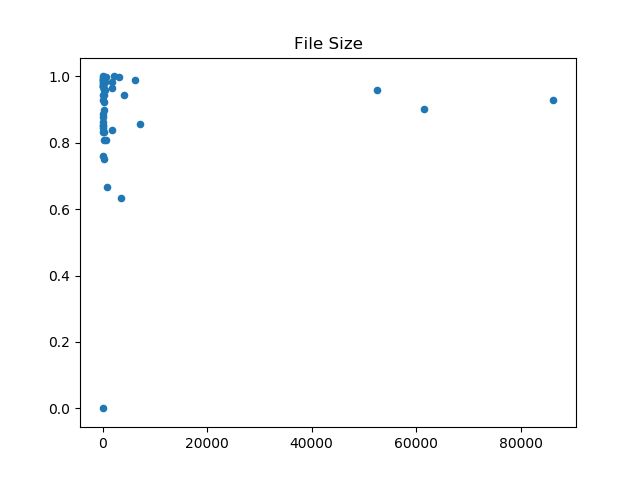

(50, 21)

In [22]:
# Team count
filtered_df = classification_df

plt.figure()
plt.title('File Size')
plt.scatter(filtered_df['fileSizeMB'], filtered_df['best'], marker= 'o', s=20)
plt.show()

filtered_df.shape